<a href="https://colab.research.google.com/github/CindyWedd/CindyWedd.github.io/blob/main/Bar_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#London data for employees

data = {
    'EmployeeID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack', 'Kim', 'Liam', 'Megan', 'Nathan', 'Olivia'],
    'Department': ['HR', 'Engineering', 'Engineering', 'HR', 'Finance', 'Sales', 'Sales', 'Engineering', 'HR', 'Finance', 'Sales', 'HR', 'Engineering', 'Sales', 'HR'],
    'JobTitle': ['Manager', 'Engineer', 'Engineer', 'Clerk', 'Analyst', 'Sales Rep', 'Sales Rep', 'Engineer', 'Clerk', 'Analyst', 'Sales Rep', 'Manager', 'Engineer', 'Sales Rep', 'Clerk'],
    'Salary': [75000, 95000, 80000, 50000, 60000, 70000, 72000, 85000, 52000, 62000, 75000, 77000, 80000, 73000, 54000],
    'HoursWorked': [40, 45, 40, 38, 42, 40, 38, 45, 39, 41, 42, 40, 44, 39, 38],
    'Bonus': [5000, 7000, 3000, 2000, 4000, 5000, 4000, 6000, 2500, 3000, 5500, 4500, 6000, 5000, 2500]
}

london = pd.DataFrame(data)

In [ ]:
# Create DataFrame
london = pd.DataFrame(data)

# Create a new column for total compensation (salary + bonus)
london['TotalCompensation'] = london['Salary'] + london['Bonus']
london.head(2)


,EmployeeID,Name,Department,JobTitle,Salary,HoursWorked,Bonus,TotalCompensation
0,101,Alice,HR,Manager,75000,40,5000,80000
1,102,Bob,Engineering,Engineer,95000,45,7000,102000


# Looking at different plotting packages

We are not going to deep dive into how to use each package. Each package could be its own pathway with everything that they can do. We will just look at the same data plotted the same way and show how each plots and a little of what they can do.

# pandas plot

This is just a basic plotting package that uses a slim version of Matplotlib. The idea is to be able to quickly make plots that you can then transform into better visuals with other packages. They are also useful in a time crunch if you just need a plot. A few easy lines and you're off

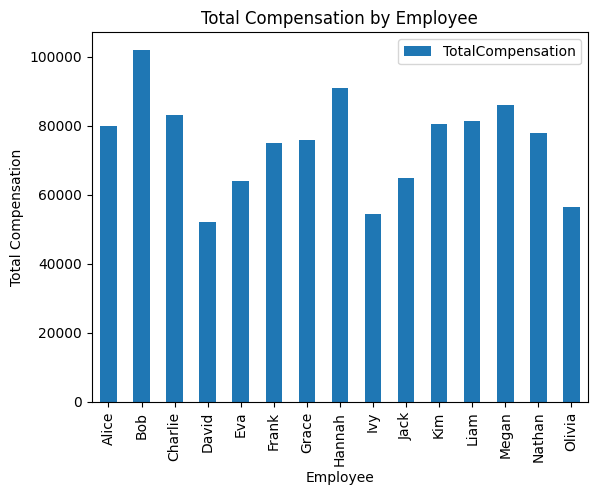

In [ ]:
pandas_plot = london.plot(kind='bar', x='Name', y='TotalCompensation', title='Total Compensation by Employee');
pandas_plot.set_xlabel('Employee');
pandas_plot.set_ylabel('Total Compensation');

When we make our plots we want to tell a clear story to the employee and allow them to gain insights. Here we kind of fail at communicationg any real information.

- Lets look at the top employee in comparison to the rest.
- lets reorder our data
- then we will work to isolate the top employee in the bar graph.

In [ ]:
london = london.sort_values(by='TotalCompensation', ascending=False)
london.head()

,EmployeeID,Name,Department,JobTitle,Salary,HoursWorked,Bonus,TotalCompensation
1,102,Bob,Engineering,Engineer,95000,45,7000,102000
7,108,Hannah,Engineering,Engineer,85000,45,6000,91000
12,113,Megan,Engineering,Engineer,80000,44,6000,86000
2,103,Charlie,Engineering,Engineer,80000,40,3000,83000
11,112,Liam,HR,Manager,77000,40,4500,81500


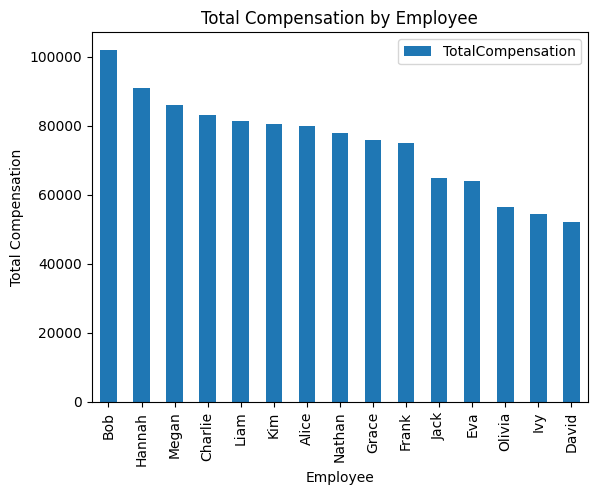

In [ ]:
pandas_plot = london.plot(kind='bar', x='Name', y='TotalCompensation', title='Total Compensation by Employee');
pandas_plot.set_xlabel('Employee');
pandas_plot.set_ylabel('Total Compensation');

<Axes: title={'center': 'Total Compensation by Employee'}, xlabel='Employee', ylabel='Total Compensation'>

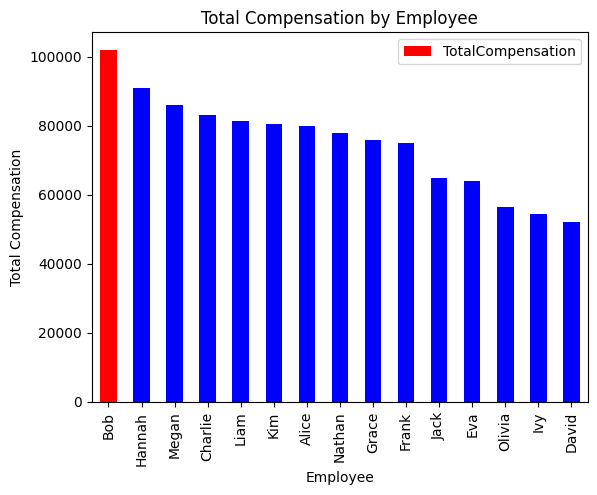

In [ ]:
# Create a color list where Bob gets red and others get blue
colors = ['red' if name == 'Bob' else 'blue' for name in london['Name']]

# Generate the pandas bar plot
pandas_plot = london.plot(kind='bar', x='Name', y='TotalCompensation', color=colors, title='Total Compensation by Employee')

# Set labels for x and y axes
pandas_plot.set_xlabel('Employee')
pandas_plot.set_ylabel('Total Compensation')

# Display the plot
pandas_plot

# Matplotlib

Matplotlib is a powerful and flexible plotting library, and it's often underestimated because of its vast capabilities. While it provides user-friendly interfaces for creating basic plots, it also offers incredible flexibility to create almost any kind of visualization you can imagine. From simple charts to complex figures with customized layouts, Matplotlib allows you to customize every aspect of your plots, giving you full control over visualizations.

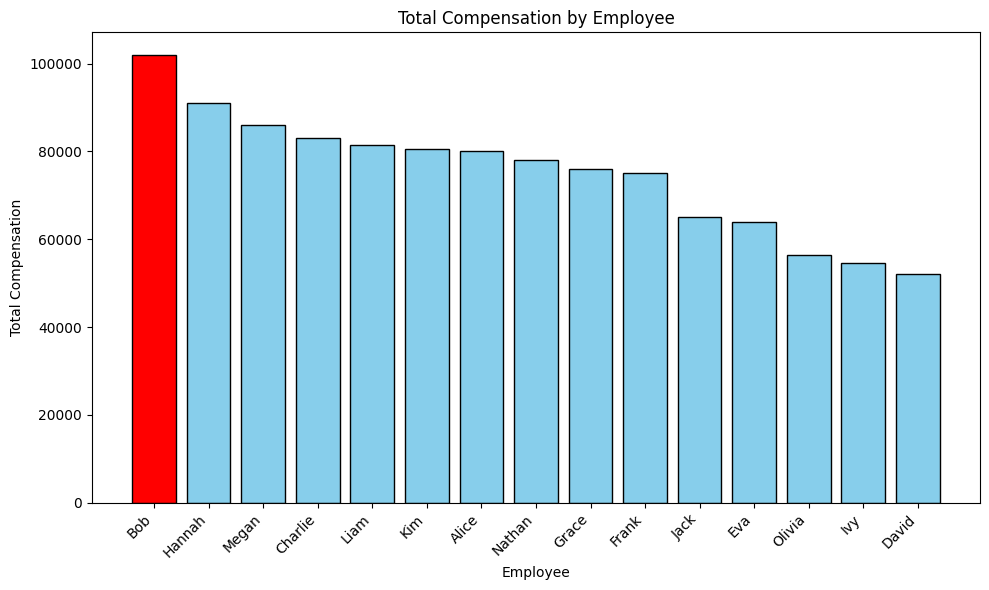

In [ ]:
# Create a bar plot for Total Compensation by Employee
plt.figure(figsize=(10, 6))
plt.bar(london['Name'], london['TotalCompensation'], color = ['red' if name == 'Bob' else 'skyblue' for name in london['Name']], edgecolor='black')

# Add labels and title
plt.title('Total Compensation by Employee')
plt.xlabel('Employee')
plt.ylabel('Total Compensation')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [ ]:
# Add a new column for color grouping
london['Color'] = london['Name'].apply(lambda x: 'red' if x == 'Bob' else 'skyblue')

# Seaborn

Seaborn is a powerful data visualization package built on top of Matplotlib that enhances its functionality and provides a more user-friendly interface for creating attractive and informative statistical graphics. It simplifies the creation of complex visualizations, with built-in support for statistical plots and easy integration with Pandas DataFrames.

It excels in:

- Advanced Statistical Plots: Seaborn makes it easy to create sophisticated statistical plots such as heatmaps, violin plots, pair plots, and regression plots.

- Improved Aesthetics: Unlike Matplotlib, which requires more effort for styling, Seaborn comes with beautiful default themes and color palettes, making your plots look polished with minimal customization.

- Integration with Pandas: Seaborn works seamlessly with Pandas DataFrames, making it easier to plot data directly without needing to manually manage x and y axes.

- Visualizing Complex Relationships: Seaborn shines in visualizing relationships between variables, especially when working with categorical and numerical data.

- Facet Grids: It offers an intuitive interface for creating multi-panel plots (faceting), allowing you to compare distributions across multiple categories.

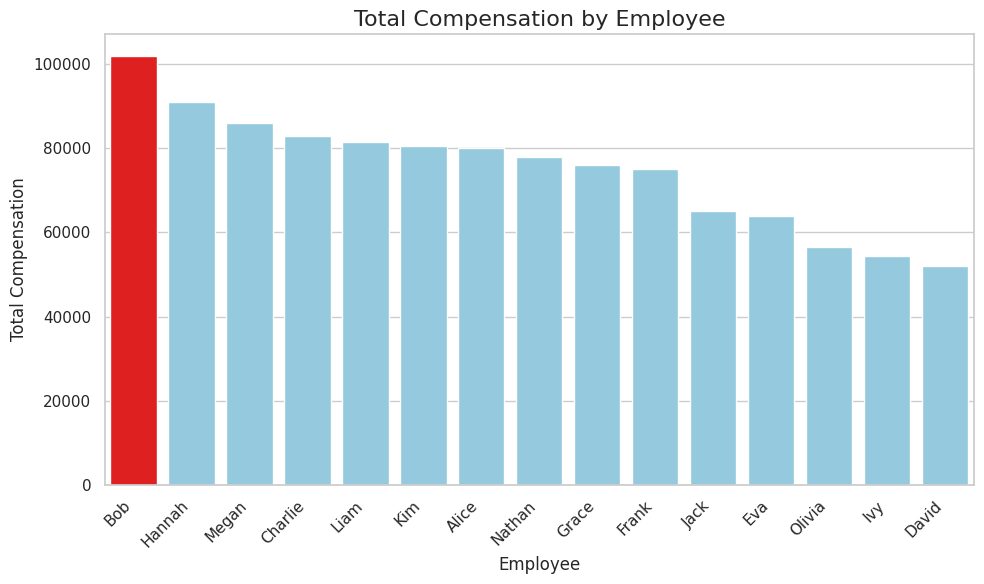

In [ ]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create the Seaborn barplot with hue based on the new 'Color' column
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Name', y='TotalCompensation', data=london, hue='Color', dodge=False, palette=['red', 'skyblue'])

# Add labels and title
bar_plot.set_title('Total Compensation by Employee', fontsize=16)
bar_plot.set_xlabel('Employee', fontsize=12)
bar_plot.set_ylabel('Total Compensation', fontsize=12)

# Remove the legend
bar_plot.legend_.remove()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Plotly

Plotly is a sophisticated and powerful data visualization library that stands out for its interactivity and versatility. It is designed to create visually appealing, highly interactive plots and is widely used for both data exploration and presentation. Unlike static plotting libraries like Matplotlib, Plotly offers a rich set of features that enable users to create dynamic, interactive, and responsive charts with just a few lines of code.

Key Features of Plotly:

- Interactivity: Plotly excels in creating interactive visualizations, allowing users to zoom, pan, hover, and click on data points. This makes it an ideal choice for web-based dashboards and data exploration applications.

- Customizability: Plotly offers extensive customization options for every aspect of your visualizations, including colors, fonts, axes, and layout. It gives users fine control over how their charts appear and behave.

- Integration with Dash: Plotly integrates seamlessly with Dash, a framework for building interactive web applications. With Dash, you can create custom data dashboards with a wide range of interactive features, ideal for real-time data monitoring and analysis.

- Exportability: Plotly charts can be exported as static images or HTML files, making them easy to embed into websites, blogs, or reports. This export flexibility ensures your interactive plots can be shared or published with ease.

- Wide Range of Plot Types: From basic charts like line plots and bar plots to advanced charts like 3D plots, heatmaps, choropleth maps, and more, Plotly supports a broad spectrum of visualizations. This makes it suitable for a wide range of industries, from finance to healthcare to scientific research.

In [ ]:
# Create hover data by combining relevant information into a single string
london['HoverInfo'] = london.apply(lambda row: f"Department: {row['Department']}<br>Job Title: {row['JobTitle']}<br>Salary: ${row['Salary']:,}<br>Bonus: ${row['Bonus']:,}<br>Total Compensation: ${row['TotalCompensation']:,}", axis=1)

# Create the Plotly bar plot
fig = px.bar(london,
             x='Name',
             y='TotalCompensation',
             color='Color',
             hover_name='Name',
             hover_data={'Color': False, 'Name': False, 'Department': True, 'JobTitle': True, 'Salary': True, 'Bonus': True, 'TotalCompensation': True},
             title="Total Compensation by Employee")

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Employee",
    yaxis_title="Total Compensation",
    xaxis_tickangle=-45,
    hoverlabel=dict(font_size=12),
    showlegend=False
)

# Show the plot
fig.show()